In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 🐼 Exploratory Analysis - Coding Challenge
---

## By Ruben Kindl & Valentin Lorenzen

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- recommended for education and development
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [2]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

In [3]:
movies.loc[movies['movieId'] == 224]

,movieId,title,genres
191,224,Don Juan DeMarco (1995),Comedy|Drama|Romance


In [4]:
movies.loc[movies['title'].isna()]

,movieId,title,genres


In [78]:
movies.loc[movies['title'].str.contains('Cars')]

,movieId,title,genres,year
3556,4867,Riding in Cars with Boys,Comedy|Drama,2001
6212,45517,Cars,Animation|Children|Comedy,2006
7639,87876,Cars 2,Adventure|Animation|Children|Comedy|IMAX,2011
9509,170957,Cars 3,Adventure|Animation|Comedy,2017


In [65]:
rating = ratings.groupby('movieId')['rating'].mean()[548]

In [66]:
round(rating)

3

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [5]:
ratings['userId'].nunique()

610

#### What is the average rating

In [6]:
ratings['rating'].mean()

3.501556983616962

#### which rating appears the most?

In [7]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [8]:
relative_frequencies = ratings['rating'].value_counts(normalize=True)

In [9]:
relative_frequencies = pd.DataFrame(relative_frequencies)

In [10]:
relative_frequencies

,rating
4.0,0.265957
3.0,0.198808
5.0,0.131015
3.5,0.130271
4.5,0.084801
2.0,0.074884
2.5,0.055040
1.0,0.027877
1.5,0.017762
0.5,0.013586


In [11]:
print("Percentage of 5 star ratings: ", round(len(ratings.loc[ratings['rating'] == 5]) / len(ratings) * 100, ndigits=3), "%")

Percentage of 5 star ratings:  13.101 %


---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [12]:
ratings.groupby('userId')['rating'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

- How many users have rated more than 20 movies?

In [13]:
print(len(ratings.groupby('userId').count().loc[ratings['movieId'] > 20]), "users have rated more than 20 movies")

593 users have rated more than 20 movies


- How many movies rated the user with the most/ least ratings?

In [14]:
print("The user who has rated the most movies rated" , ratings.groupby('userId')['rating'].count().sort_values().max(), "movies")

The user who has rated the most movies rated 2698 movies


In [15]:
print("The user who has rated the least movies rated" , ratings.groupby('userId')['rating'].count().sort_values().min(), "movies")

The user who has rated the least movies rated 20 movies


-  What is the *median* number of ratings?

In [16]:
print("The median number of ratings is:", ratings.groupby('userId')['rating'].count().median())

The median number of ratings is: 70.5


- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

<AxesSubplot:xlabel='rating', ylabel='Count'>

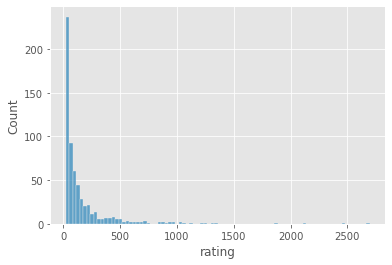

In [17]:
sns.histplot(data=ratings.groupby('userId')['rating'].count())

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [18]:
ratings.groupby('userId')['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

- Which user gave the worst ratings on average, which user gave the best ratings?

In [19]:
ratings.groupby('userId')['rating'].mean().sort_values()

userId
442    1.275000
139    2.144330
508    2.145833
153    2.217877
567    2.245455
         ...   
30     4.735294
25     4.807692
515    4.846154
251    4.869565
53     5.000000
Name: rating, Length: 610, dtype: float64

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

In [20]:
ratings.groupby('userId')['rating'].mean().sort_values().loc[ratings['movieId'] > 20]

userId
442    1.275000
139    2.144330
508    2.145833
153    2.217877
311    2.339286
         ...   
30     4.735294
25     4.807692
515    4.846154
251    4.869565
53     5.000000
Name: rating, Length: 593, dtype: float64

- Plot the distribution of average ratings! How would you characterize the distribution?

<AxesSubplot:xlabel='rating', ylabel='Count'>

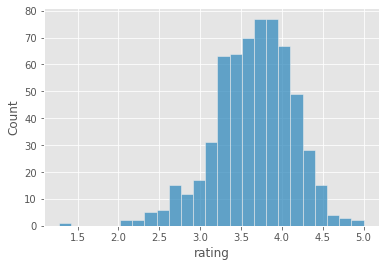

In [21]:
sns.histplot(ratings.groupby('userId')['rating'].mean().sort_values())

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

In [22]:
average = pd.DataFrame(ratings.groupby('userId')['rating'].mean().sort_index())

In [23]:
count = pd.DataFrame(ratings.groupby('userId')['rating'].count())

In [24]:
average['count'] = count

In [25]:
average.corr()

,rating,count
rating,1.000000,-0.198997
count,-0.198997,1.000000


--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [26]:
movies.duplicated().sum()

0

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [27]:
ratings['movieId'].isin(movies['movieId']).value_counts()

True    100836
Name: movieId, dtype: int64

#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [28]:
movies.loc[movies['title'].isna()]

,movieId,title,genres


In [29]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [30]:
movies['year'] = movies['title'].str.extract('\(([0-9]{4})\)')

In [31]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [32]:
titles = movies['title'].str.partition(' (', True)

In [35]:
movies['title'] = titles[0]

In [48]:
movies[movies['title'].str.fullmatch('Ted')]['movieId'].values[0]

95441

In [ ]:
movies.loc[movies['title'].isna()]

In [76]:
movie = movies[movies['title'].str.contains('Up')]['title'].values

In [77]:
movie

array(['Once Upon a Time... When We Were Colored',
       'Up Close and Personal', 'Air Up There, The',
       'Englishman Who Went Up a Hill But Came Down a Mountain, The',
       'Denise Calls Up', 'Bringing Up Baby', 'Tie Me Up! Tie Me Down!',
       "Cheech and Chong's Up in Smoke", 'Once Upon a Time in the West',
       'Once Upon a Time in America', 'Pump Up the Volume',
       'Honey, I Blew Up the Kid', '52 Pick-Up', '42 Up', 'Hanging Up',
       'Up at the Villa', 'Blow-Up', '3 Ninjas Knuckle Up',
       'Dancer Upstairs, The', "What's Up, Doc?",
       "What's Up, Tiger Lily?", 'Uptown Girls',
       'Once Upon a Time in the Midlands', 'Once Upon a Time in Mexico',
       'Once Upon a Time in China', 'Once Upon a Time in China II',
       'Once Upon a Time in China III',
       'Lagaan: Once Upon a Time in India', '28 Up', '35 Up',
       'Upside of Anger, The', 'Break-Up, The', 'Step Up',
       'Shut Up & Sing', '49 Up', 'Seven Up!', 'Wake Up, Ron Burgundy',
       '21 Up',

In [ ]:
movies[movies['title'].str.match("Grumpy Old Men")]

In [ ]:
movies[movies['title'] == 'Grumpier Old Men']

#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [ ]:
genres = movies['genres'].str.split('|').explode()

In [ ]:
genres = pd.DataFrame(genres)

In [ ]:
genres['movieId'] = movies['movieId']

In [ ]:
genres.set_index('movieId', inplace=True, drop=True)

In [ ]:
genres

In [ ]:
genres.groupby(genres.index).count().sort_values('genres')

In [ ]:
movies.loc[movies['title'] == "Rubber"]

---
## Fuzzy String Search

#### Search for "star wars" movies in the items table

- install the library [thefuzz](https://github.com/seatgeek/thefuzz)
- search for the query "star wars" in the list of movie titles
    - set the `movieId` as index for the dataframe
    - extract the `titles` column and use it as input to `extractBests()`
- look at the following code snippet and research:
    - what is the third entry in the tuples returned?
    - what is the second entry in the tuples returned?

In [ ]:
movie

In [ ]:
movies2 = movies

In [ ]:
movies2.set_index("movieId", drop=True, inplace=True)

In [ ]:
movies2 = movies['title']

In [79]:
from thefuzz import fuzz, process

search_query = "Cars"
match = process.extractBests(
    search_query, movies['title'], scorer=fuzz.token_set_ratio
)
match

[('Riding in Cars with Boys', 100, 3556),
 ('Cars', 100, 6212),
 ('Cars 2', 100, 7639),
 ('Cars 3', 100, 9509),
 ('Icarus', 80, 9609)]

In [ ]:
import scipy

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [ ]:
df = ratings.merge(movies, on='movieId')

---
#### Count the number of ratings per movie title!

In [ ]:
df.groupby('movieId')['rating'].count()

- What are the top 10 most rated movies in the dataset?

In [ ]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Look at the top 10 movies that have the highest coefficient of variation!
 

In [ ]:
df.groupby('title')['rating'].std().sort_values(ascending=False)

---

#### Calculate the average rating per movie title!

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

- Make a visualization of the distribution of average ratings per movie

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).plot(kind='hist', figsize=(15,10))

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

In [ ]:
print (df.groupby('title')['rating'].mean().sort_values(ascending=False).head(1))
print (df.groupby('title')['rating'].mean().sort_values(ascending=False).tail(1))

In [ ]:
print(df.groupby('title')['rating'].mean().sort_values(ascending=False).loc[df.groupby('title')['rating'].count() > 30].head(1))
print(df.groupby('title')['rating'].mean().sort_values(ascending=False).loc[df.groupby('title')['rating'].count() > 30].tail(1))

- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!

In [ ]:
df.groupby('year')['rating'].mean().plot(kind='line', figsize=(18,13), color="blue")
plt.title('\nAverage rating of movies over time\n', fontsize=32)
line1 = plt.axvline(65, 0.98,0.02, color='red', linestyle="--", alpha=0.5)
plt.xlabel('\nYear', fontsize=20)
plt.ylabel('Average Rating\n', fontsize=20)
plt.savefig('avg_rating_over_time.jpg');